In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [7]:
data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [9]:
# data = data.replace('?', np.nan)

# def get_first_cabin(row):
#     try:
#         return row.split()[0]
#     except:
#         return np.nan
    
# data['cabin'] = data['cabin'].apply(get_first_cabin)

# data.to_csv('titanic.csv', index=False)

In [11]:
data = pd.read_csv('./titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [13]:
data['cabin_null'] = np.where(data['cabin'].isnull(), 1, 0)

In [14]:
data.groupby(['survived'])['cabin_null'].mean()

survived
0    0.873918
1    0.614000
Name: cabin_null, dtype: float64

In [15]:
data['cabin'].isnull().groupby(data['survived']).mean()

survived
0    0.873918
1    0.614000
Name: cabin, dtype: float64

In [16]:
data['age_null'] = np.where(data['age'].isnull(), 1, 0)

data.groupby(['survived'])['age_null'].mean()

survived
0    0.234858
1    0.146000
Name: age_null, dtype: float64

In [17]:
data[data['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_null,age_null
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,0,0
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",0,0


In [18]:
data = pd.read_csv('/Users/mattmastin/Desktop/loan.csv',
                  usecols=['emp_title', 'emp_length'],
                  na_values='',
                  keep_default_na=False)
data.head()

,emp_title,emp_length
0,Chef,10+ years
1,Postmaster,10+ years
2,Administrative,6 years
3,IT Supervisor,10+ years
4,Mechanic,10+ years


In [19]:
data.isnull().mean()

emp_title     0.073841
emp_length    0.000000
dtype: float64

In [20]:
print(f'number of dif employer names {len(data.emp_title.unique())}')
data.emp_title.unique()[0:20]

number of dif employer names 512698


array(['Chef', 'Postmaster ', 'Administrative', 'IT Supervisor',
       'Mechanic', 'Director COE', 'Account Manager',
       'Assistant Director', 'Legal Assistant III', nan, 'Consultant',
       'Job Coach Supervisor', 'Quality Field Engineer', 'Teller ',
       'respritory therapist', 'Worship Director', 'Processor ',
       'Neonatal Nurse Practitioner', 'Stationary Engineer',
       'Exhibits director'], dtype=object)

In [21]:
data.emp_length.unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', 'n/a', '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [22]:
data.emp_length.value_counts() / len(data)

10+ years    0.330878
2 years      0.090096
< 1 year     0.084041
3 years      0.079956
1 year       0.065646
n/a          0.064984
5 years      0.061795
4 years      0.060427
6 years      0.045397
7 years      0.041003
8 years      0.040658
9 years      0.035120
Name: emp_length, dtype: float64

In [23]:
length_dict = {k: '0-10 Years' for k in data.emp_length.unique()}
length_dict['10+ years'] = '10+ years'
length_dict['n/a'] = 'n/a'

length_dict

{'10+ years': '10+ years',
 '6 years': '0-10 Years',
 '4 years': '0-10 Years',
 '< 1 year': '0-10 Years',
 '2 years': '0-10 Years',
 '9 years': '0-10 Years',
 'n/a': 'n/a',
 '5 years': '0-10 Years',
 '3 years': '0-10 Years',
 '7 years': '0-10 Years',
 '1 year': '0-10 Years',
 '8 years': '0-10 Years'}

In [24]:
data['emp_length_redefined'] = data.emp_length.map(length_dict)

data.emp_length_redefined.unique()

array(['10+ years', '0-10 Years', 'n/a'], dtype=object)

In [25]:
not_employed = len(data[data.emp_title.isnull()])

data[data.emp_title.isnull()].groupby(
    ['emp_length_redefined'])['emp_length'].count().sort_values() / not_employed

emp_length_redefined
10+ years     0.021069
0-10 Years    0.103678
n/a           0.875254
Name: emp_length, dtype: float64

In [26]:
employed = len(data.dropna(subset=['emp_title']))

# % of borrowers within each category
data.dropna(subset=['emp_title']).groupby(
    ['emp_length_redefined'])['emp_length'].count().sort_values() / employed

emp_length_redefined
n/a           0.000382
10+ years     0.355579
0-10 Years    0.644039
Name: emp_length, dtype: float64

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to build machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# to evaluate the models
from sklearn.metrics import roc_auc_score

# to separate data into train and test
from sklearn.model_selection import train_test_split

In [29]:
data = pd.read_csv('./titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [30]:
print(f'num categories in Name {len(data.name.unique())}')
print(f'num categories in Gender {len(data.sex.unique())}')
print(f'num categories in Ticket {len(data.ticket.unique())}')
print(f'num categories in Cabin {len(data.cabin.unique())}')
print(f'num categories in Embarked {len(data.embarked.unique())}')
print(f'num categories in Titanic {len(data)}')

num categories in Name 1307
num categories in Gender 2
num categories in Ticket 929
num categories in Cabin 182
num categories in Embarked 4
num categories in Titanic 1309


In [31]:
data.cabin.unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


In [32]:
data['cabin_reduced'] = data['cabin'].astype(str).str[0]

data[['cabin', 'cabin_reduced']].head()

,cabin,cabin_reduced
0,B5,B
1,C22,C
2,C22,C
3,C22,C
4,C22,C


In [33]:
print(f'num categories Cabin {len(data.cabin.unique())}')
print(f'num categories Cabin Reduced {len(data.cabin_reduced.unique())}')

num categories Cabin 182
num categories Cabin Reduced 9


In [34]:
use_cols = ['cabin', 'cabin_reduced', 'sex']

X_train, X_test, y_train, y_test = train_test_split(
    data[use_cols],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [35]:
unique_to_test_set = [x for x in X_test.cabin.unique() if x not in X_train.cabin.unique()]

len(unique_to_test_set)

36

In [36]:
unique_to_train_set = [
    x for x in X_train['cabin_reduced'].unique() 
    if x not in X_test['cabin_reduced'].unique()
]

In [37]:
len(unique_to_train_set)

1

In [38]:
cabin_dict = {k: i for i, k in enumerate(X_train.cabin.unique(), 0)}
cabin_dict

{nan: 0,
 'E36': 1,
 'C68': 2,
 'E24': 3,
 'C22': 4,
 'D38': 5,
 'B50': 6,
 'A24': 7,
 'C111': 8,
 'F': 9,
 'C6': 10,
 'C87': 11,
 'E8': 12,
 'B45': 13,
 'C93': 14,
 'D28': 15,
 'D36': 16,
 'C125': 17,
 'B35': 18,
 'T': 19,
 'B73': 20,
 'B57': 21,
 'A26': 22,
 'A18': 23,
 'B96': 24,
 'G6': 25,
 'C78': 26,
 'C101': 27,
 'D9': 28,
 'D33': 29,
 'C128': 30,
 'E50': 31,
 'B26': 32,
 'B69': 33,
 'E121': 34,
 'C123': 35,
 'B94': 36,
 'A34': 37,
 'D': 38,
 'C39': 39,
 'D43': 40,
 'E31': 41,
 'B5': 42,
 'D17': 43,
 'F33': 44,
 'E44': 45,
 'D7': 46,
 'A21': 47,
 'D34': 48,
 'A29': 49,
 'D35': 50,
 'A11': 51,
 'B51': 52,
 'D46': 53,
 'E60': 54,
 'C30': 55,
 'D26': 56,
 'E68': 57,
 'A9': 58,
 'B71': 59,
 'D37': 60,
 'F2': 61,
 'C55': 62,
 'C89': 63,
 'C124': 64,
 'C23': 65,
 'C126': 66,
 'E49': 67,
 'E46': 68,
 'D19': 69,
 'B58': 70,
 'C82': 71,
 'B52': 72,
 'C92': 73,
 'E45': 74,
 'C65': 75,
 'E25': 76,
 'B3': 77,
 'D40': 78,
 'C91': 79,
 'B102': 80,
 'B61': 81,
 'A20': 82,
 'B36': 83,
 'C7': 84,

In [39]:
X_train.loc[:, 'cabin_mapped'] = X_train.loc[:, 'cabin'].map(cabin_dict)
X_test.loc[:, 'cabin_mapped'] = X_test.loc[:, 'cabin'].map(cabin_dict)

X_train[['cabin_mapped', 'cabin']].head(10)

,cabin_mapped,cabin
501,0,NaN
588,0,NaN
402,0,NaN
1193,0,NaN
686,0,NaN
971,0,NaN
117,1,E36
540,0,NaN
294,2,C68
261,3,E24


In [40]:
X_train.loc[:, 'sex'] = X_train.loc[:, 'sex'].map({'male': 0, 'female': 1})
X_test.loc[:, 'sex'] = X_test.loc[:, 'sex'].map({'male': 0, 'female': 1})

X_train.sex.head()

501     1
588     1
402     1
1193    0
686     1
Name: sex, dtype: int64

In [41]:
X_train[['cabin_mapped', 'cabin_reduced', 'sex']].isnull().sum()

cabin_mapped     0
cabin_reduced    0
sex              0
dtype: int64

In [42]:
X_test[['cabin_mapped', 'cabin_reduced', 'sex']].isnull().sum()

cabin_mapped     41
cabin_reduced     0
sex               0
dtype: int64

In [45]:
X_test.fillna(-1)

,cabin,cabin_reduced,sex,cabin_mapped
1139,-1,n,0,0.0
533,-1,n,1,0.0
459,-1,n,0,0.0
1150,-1,n,0,0.0
393,-1,n,0,0.0
...,...,...,...,...
914,-1,n,0,0.0
580,-1,n,1,0.0
1080,-1,n,0,0.0
1249,F38,F,0,-1.0


In [46]:
X_test[['cabin_mapped', 'cabin_reduced', 'sex']].isnull().sum()

cabin_mapped     41
cabin_reduced     0
sex               0
dtype: int64

In [47]:
rf = RandomForestClassifier(n_estimators=200, random_state=39)

rf.fit(X_train[['cabin_mapped', 'sex']], y_train)

pred_train = rf.predict_proba(X_train[['cabin_mapped', 'sex']])
pred_test = rf.predict_proba(X_test[['cabin_mapped', 'sex']].fillna(0))

print('train set')
print(f'rf roc auc {roc_auc_score(y_train, pred_train[:, 1])}')
print('test set')
print(f'rf roc auc {roc_auc_score(y_test, pred_test[:, 1])}')

train set
rf roc auc 0.853790650048556
test set
rf roc auc 0.7691361097284443


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to separate data intro train and test sets
from sklearn.model_selection import train_test_split

use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('/Users/mattmastin/Desktop/houseprice.csv', usecols=use_cols)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [2]:
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('variable ', col, 'num labels', data[col].nunique())
    
print('total houses', len(data))

variable  Neighborhood num labels 25
variable  Exterior1st num labels 15
variable  Exterior2nd num labels 16
total houses 1460


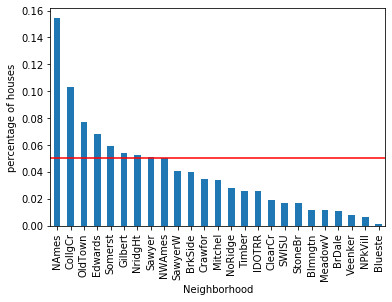

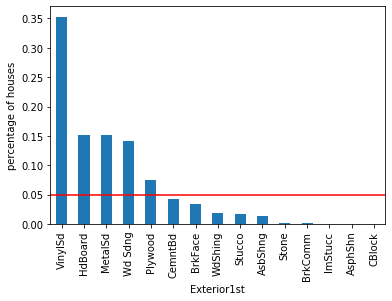

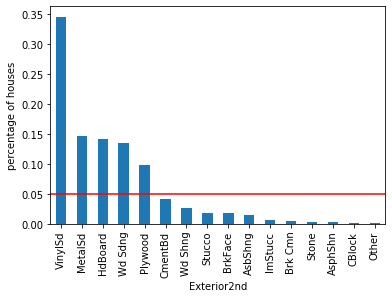

In [3]:
total_houses = len(data)

for col in cat_cols:
    temp_df = pd.Series(data[col].value_counts() / total_houses)
    
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('percentage of houses')
    plt.show()

In [4]:
def calculate_mean_target_per_category(df, var):
    total_houses = len(df)
    
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']
    
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                                      on=var,
                                      how='left')
    
    return temp_df

In [5]:
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
temp_df

,Neighborhood,perc_houses,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


In [8]:
def plot_categories(df, var):
    fig, ax = plt.subplots(figsize=(8,4))
    plt.xticks(df.index, df[var], rotation=90)
    
    ax2 = ax.twinx()
    ax.bar(df.index, df['perc_houses'], color='lightgrey')
    ax2.plot(df.index, df['SalePrice'], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()

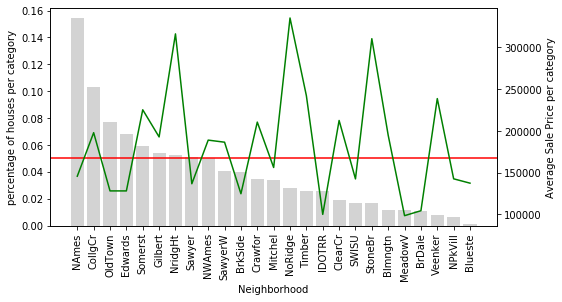

In [9]:
plot_categories(temp_df, 'Neighborhood')

In [13]:
def group_rare_labels(df, var):
    total_houses = len(df)
    
    temp_df = pd.Series(df[var].value_counts() / total_houses)
    
    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }
    
    tmp = df[var].map(grouping_dict)
    
    return tmp

In [14]:
data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')

data[['Neighborhood', 'Neighborhood_grouped']].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare
5,Mitchel,rare
6,Somerst,Somerst
7,NWAmes,NWAmes
8,OldTown,OldTown
9,BrkSide,rare


In [15]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import pylab
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standarize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [16]:
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data,
                     columns=boston_dataset.feature_names)

boston['MEDV'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
np.random.seed(29)

n = 200
x = np.random.randn(n) * 2
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,-0.834964,-5.446382
1,1.412064,15.050921
2,3.831969,39.008534
3,-4.283511,-43.346458
4,1.438114,12.769639


In [18]:
toy_df.shape

(200, 2)

Text(0.5, 6.79999999999999, 'ind variable')

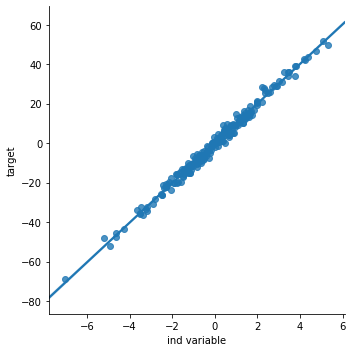

In [19]:
sns.lmplot(x='x', y='y', data=toy_df, order=1)

plt.ylabel('target')
plt.xlabel('ind variable')

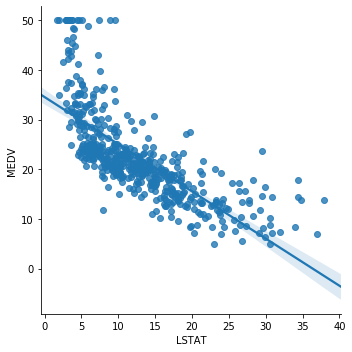

In [20]:
sns.lmplot(x='LSTAT', y='MEDV', data=boston, order=1)

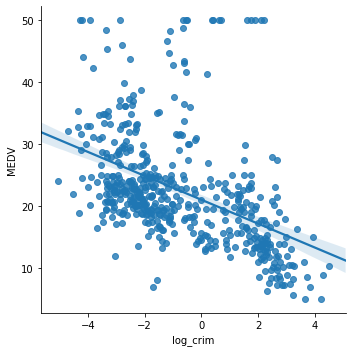

In [22]:
boston['log_crim'] = np.log(boston['CRIM'])

sns.lmplot(x='log_crim', y='MEDV', data=boston, order=1)

In [23]:
boston.drop(labels='log_crim', inplace=True, axis=1)

Text(0, 0.5, 'real value')

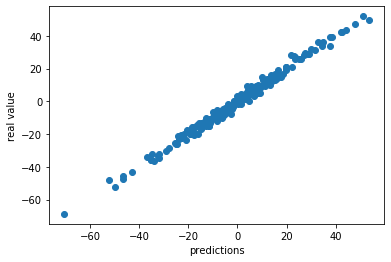

In [24]:
linreg = LinearRegression()

linreg.fit(toy_df['x'].to_frame(), toy_df['y'])

pred = linreg.predict(toy_df['x'].to_frame())

error = toy_df['y'] - pred

plt.scatter(x=pred, y=toy_df['y'])
plt.xlabel('predictions')
plt.ylabel('real value')

Text(0.5, 0, 'residuals')

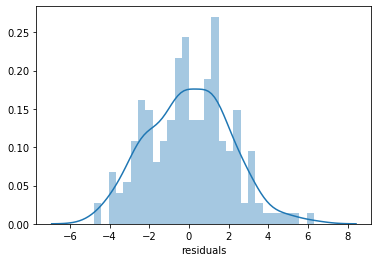

In [25]:
sns.distplot(error, bins=30)
plt.xlabel('residuals')

In [30]:
# correlation_matrix = boston[features].corr().round(2)

# figure = plt.figure(figsize=(12,12))
# sns.heatmap(data=correlation_matrix, annot=True)

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import pylab
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

In [32]:
boston_dataset = load_boston()

In [33]:
boston = pd.DataFrame(boston_dataset.data,
                     columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [40]:
titanic = pd.read_csv('./titanic.csv',
                      usecols=['age', 'fare'])

titanic.dropna(subset=['age'], inplace=True)

titanic.head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


In [41]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('histo')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist='norm', plot=pylab)
    plt.ylabel('rm quantiles')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('boxplot')
    
    plt.show()
    

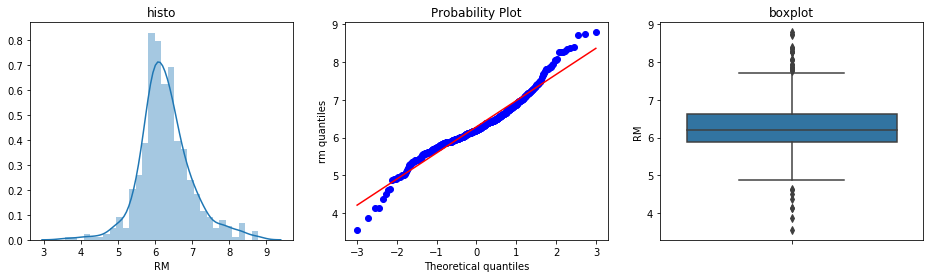

In [42]:
diagnostic_plots(boston, 'RM')

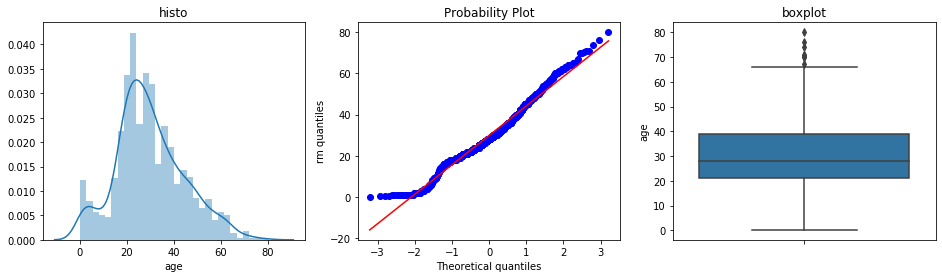

In [43]:
diagnostic_plots(titanic, 'age')

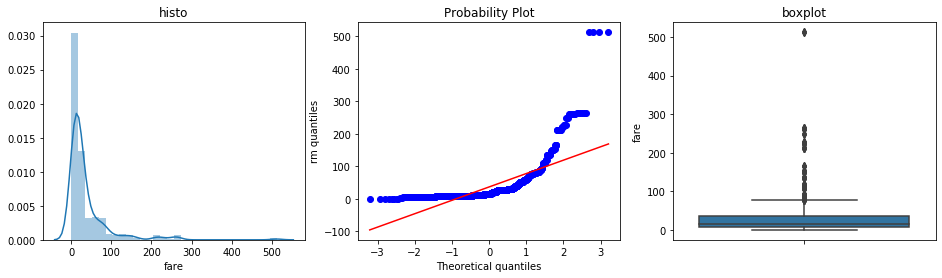

In [46]:
titanic.dropna(subset=['fare'], inplace=True)

diagnostic_plots(titanic, 'fare')

In [47]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    
    return upper_boundary, lower_boundary

In [48]:
upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.392485817597748, 4.176782957105809)